In [1]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [104]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv('/home/jovyan/work/this-is-the-one/2018_padro_nacionalitat_per_sexe.csv')
head(barris)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_integer(),
  Codi_Districte = col_integer(),
  Nom_Districte = col_character(),
  Codi_Barri = col_integer(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 6 x 8
    Any Codi_Districte Nom_Districte Codi_Barri Nom_Barri    Sexe  Nacionalitat
  <int>          <int> <chr>              <int> <chr>        <chr> <chr>       
1  2018              1 Ciutat Vella           1 el Raval     Home  Espanya     
2  2018              1 Ciutat Vella           2 el Barri Gò… Home  Espanya     
3  2018              1 Ciutat Vella           3 la Barcelon… Home  Espanya     
4  2018              1 Ciutat Vella           4 Sant Pere, … Home  Espanya     
5  2018              2 Eixample               5 el Fort Pie… Home  Espanya     
6  2018              2 Eixample               6 la Sagrada … Home  Espanya     
# ... with 1 more variable: Nombre <int>


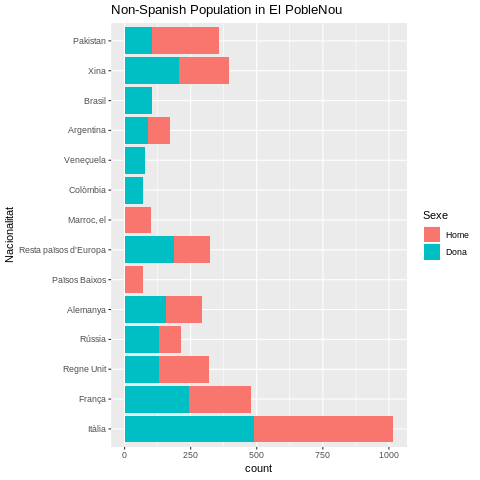

In [105]:
%%R

# Let's manually convert a few columns into factors. 
barris <- barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
poblenou <- barris %>% filter(Nom_Barri=="el Poblenou")

# Second, remove the nationality 'Espanya'
poblenou_ns <- poblenou %>% filter(Nacionalitat!='Espanya')
plot_data <- poblenou_ns %>% group_by(Nacionalitat, Sexe) %>% summarise(count = sum(Nombre))

# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you.
ggplot(data=plot_data %>% filter(count>70), aes(x=Nacionalitat,y=count, fill= Sexe)) + 
    geom_col() + coord_flip() + ggtitle("Non-Spanish Population in El PobleNou")

#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal
#
# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!



# Problem 3: Classes in Python

In [106]:
# Create a class called "RandomClassifier". 

# It's constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!

class RandomClassifier:
  
    def __init__(self, probability):
        self.probability = probability
        
    def predict(self, x):
        return np.random.binomial(size=1, n=1, p= self.probability)


In [107]:
import numpy as np

r = RandomClassifier(probability = .2)
m = np.mean([r.predict(x = i) for i in np.arange(100000)])

np.testing.assert_approx_equal(m, 0.2, 2)


# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

A pure function is one which does not affect variables outside of the function - nor does it's return value depend on other local variables.  With no side effects and consistent retrn values - we can be confident we can use these functions without causing code errors later on from changed values/types.

### What is lazy evaluation and when might you use it? (2-3 lines)

Lazy evaluation delays the evaluation of an expression until it is needed.  This can allow for faster performance by avoiding unneeded calculations and provide a way to deal with potentially infinite data structures.  It also allows for access out of order after a structure has been initialized.